# 向量测量

## 1. 向量乘法

向量相乘有两种方法: **点积** ($u \cdot v$) 和**向量积** ($u \times v$)

对于数 (标量) 来说, 这两种运算含义相同, 但对于向量来说, 这两种运算的含义完全不同:
- 点积取两个向量并返回一个数 (标量)
- 向量积取两个向量并返回一个新向量

点积和向量积都可以推断出三维空间中向量的长度和方向

In [1]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector
from common.vector_draw import (
    Color,
    draw, Points, Arrow,
    draw3d, Points3D, Arrow3D, Segment3D, Box3D,
)
from math import sqrt, sin, cos, pi
from typing import Iterator


### 1.1. 点积

点积 (也叫内积) 是对两个向量的运算, 返回一个标量.

换句话说给定两个向量 $u$ 和 $v$，那么 $u \cdot v$ 的结果是实数.

点积适用于二维, 三维等任意维度的向量. 它可以被看作测量输入向量对的 **对齐程度**.

**知识**: 计算两个向量的点积

In [2]:
def dot(u: Vector, v: Vector) -> float:
    return sum([coord1 * coord2 for coord1, coord2 in zip(u, v)])


In [5]:
# 
u, v = (1, 1), (2, 2)i
r = dot(u, v)

r

4

**知识:** 点积为正数的两个向量方向相似

**知识:** 点积为负数的两个向量方向相反

**知识:** 

**练习:** 绘制点积为 `0` 的两个二维向量

绘制 `(1, 0)` 和 `(0, 2)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

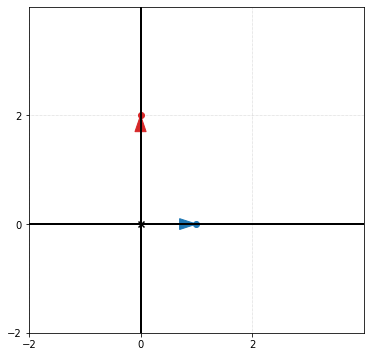

In [7]:
# 定义两个二维向量
u, v = (1, 0), (0, 2)
# 计算二维向量的点积
r = dot(u, v)

# 绘制相互垂直的二维向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
    grid=(2, 2)
)


**练习:** 绘制点积为 `0` 的两个三维向量

绘制 `(0, 3, 0)` 和 `(0, 0, -5)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

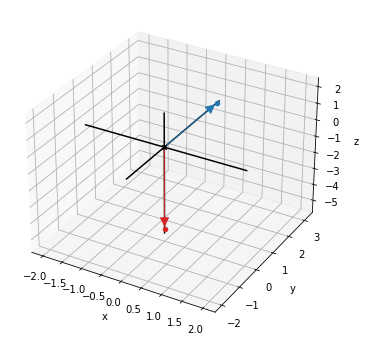

In [9]:
# 定义两个三维向量
u, v = (0, 3, 0), (0, 0, -5)
# 计算三维向量的点积
r = dot(u, v)

# 绘制相互垂直的三维向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)
